In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,OneHotEncoder

# *Exploratory Data Analysis (EDA)*

In [30]:
data = 'E:/Heart_Disease_Project/data/HeartDiseaseTrain-Test.csv'
df = pd.read_csv(data)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [31]:
df.shape

(1025, 14)

In [32]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
resting_blood_pressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholestoral,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
Max_heart_rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
target,1025.0,0.513171,0.500070,0.0,0.0,1.0,1.0,1.0


In [35]:
df.describe(include='O').T

,count,unique,top,freq
sex,1025,2,Male,713
chest_pain_type,1025,4,Typical angina,497
fasting_blood_sugar,1025,2,Lower than 120 mg/ml,872
rest_ecg,1025,3,ST-T wave abnormality,513
exercise_induced_angina,1025,2,No,680
slope,1025,3,Flat,482
vessels_colored_by_flourosopy,1025,5,Zero,578
thalassemia,1025,4,Fixed Defect,544


In [36]:
target_counts = df['target'].value_counts()
target_counts

target
1    526
0    499
Name: count, dtype: int64

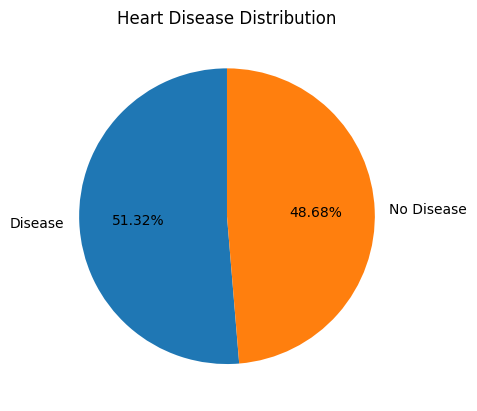

In [37]:
plt.pie(target_counts,
        autopct='%.2f%%',
        labels=target_counts.index.map({0: "No Disease", 1: "Disease"}),
        startangle=90)
plt.title('Heart Disease Distribution')
plt.show()

In [38]:
categorical_features = df.select_dtypes(include='O').columns
numerical_features = df.select_dtypes(include=['int64','float64']).columns.drop('target')
categorical_features , numerical_features

(Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
        'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
        'thalassemia'],
       dtype='object'),
 Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
        'oldpeak'],
       dtype='object'))

In [39]:
categorical_features.__len__(), numerical_features.__len__()

(8, 5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12784\4089875122.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageGroup = df.groupby('age_group')['target'].mean().reset_index()


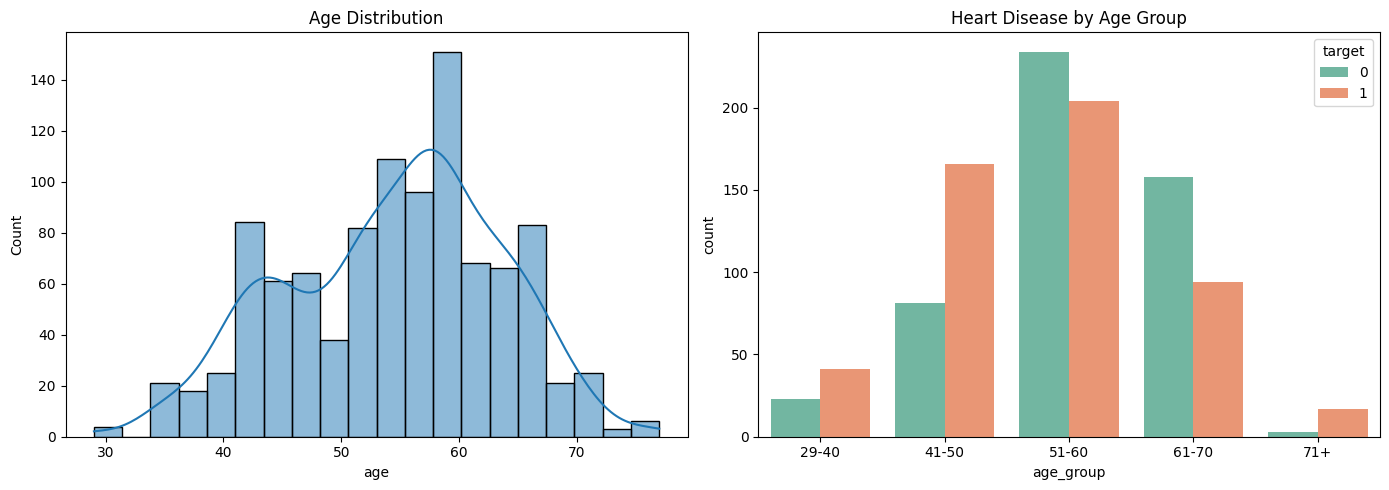

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (14,5))

# Age Distribution
sns.histplot(x ='age' , data=df, kde=True, bins=20, ax=axes[0])
axes[0].set_title('Age Distribution')

# Target by age group
df['age_group'] = pd.cut(df['age'], bins=[29,40,50,60,70,80], labels=['29-40','41-50','51-60','61-70','71+'])
ageGroup = df.groupby('age_group')['target'].mean().reset_index()
sns.countplot(x = 'age_group' , data = df , hue = 'target', palette='Set2', ax=axes[1])
axes[1].set_title("Heart Disease by Age Group")


plt.tight_layout()
plt.show()

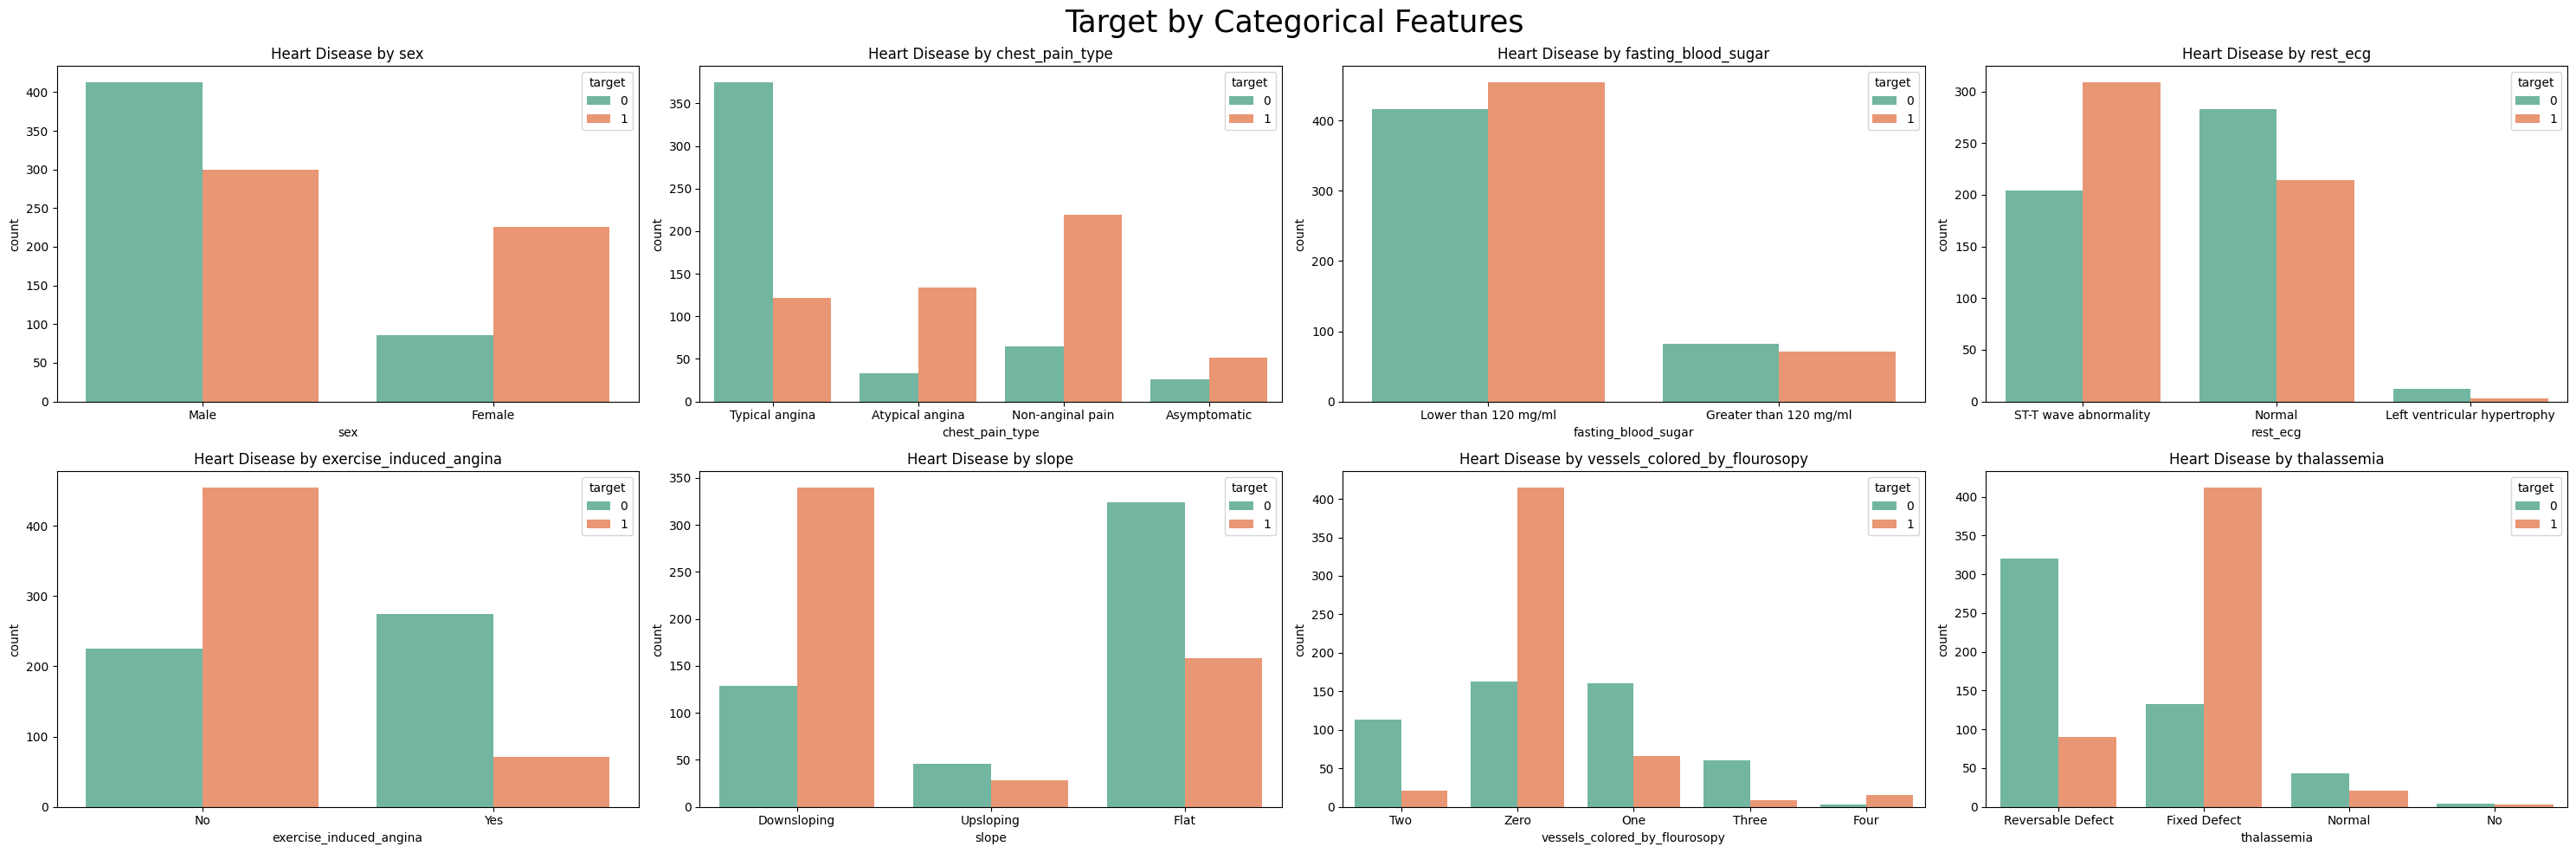

In [41]:
# Target by Categorical Features
fig , axes = plt.subplots(2,4, figsize = (30,10))
axes = axes.flatten() 
for i,col in enumerate(categorical_features):
    sns.countplot(x= col, hue='target', data = df,palette='Set2', ax=axes[i])
    axes[i].set_title(f'Heart Disease by {col}')
    
plt.suptitle('Target by Categorical Features',fontsize = 25)
plt.tight_layout()
plt.show()


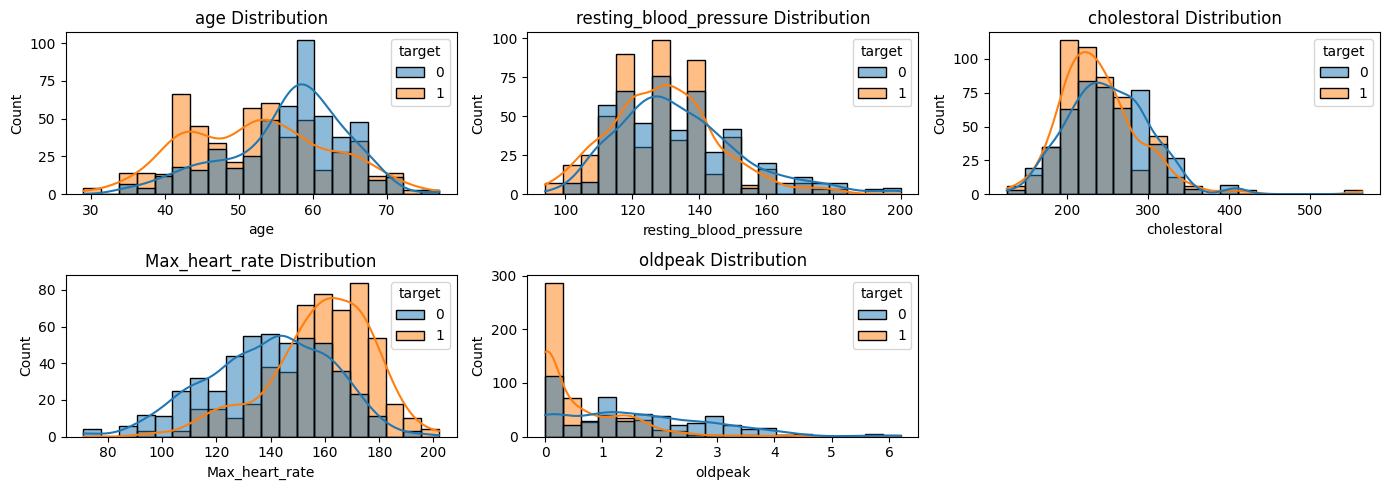

In [42]:
# Target by Numrical Features
fig , axes = plt.subplots(2,3,figsize = (14,5))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(x = col , data = df, kde= True, bins=20,hue='target', ax= axes[i])
    axes[i].set_title(f'{col} Distribution')
    
# remove empty subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

In [43]:
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix["target"].sort_values(ascending = False)

target                    1.000000
Max_heart_rate            0.422895
cholestoral              -0.099966
resting_blood_pressure   -0.138772
age                      -0.229324
oldpeak                  -0.438441
Name: target, dtype: float64

<Axes: >

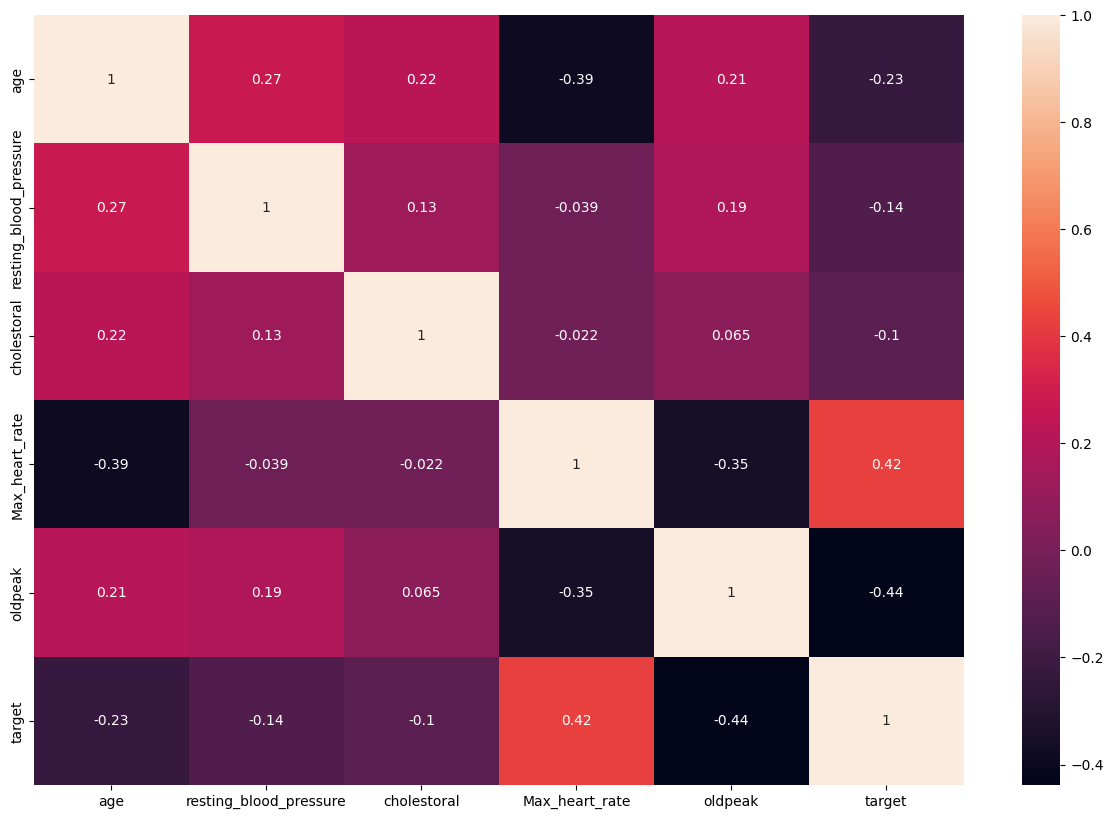

In [44]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# *Data Preprocessing & Cleaning*

In [45]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target,age_group
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0,51-60
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0,51-60
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0,61-70
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0,61-70
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0,61-70


*check null Values*

In [46]:
missing_summary = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).round(2)
print("Missing values per column:")
print(pd.DataFrame({
    "Missing Values": missing_summary,
    "Percentage": missing_percentage
}).sort_values(by="Percentage", ascending=False))

Missing values per column:
                               Missing Values  Percentage
age_group                                   4        0.39
sex                                         0        0.00
age                                         0        0.00
resting_blood_pressure                      0        0.00
cholestoral                                 0        0.00
fasting_blood_sugar                         0        0.00
chest_pain_type                             0        0.00
rest_ecg                                    0        0.00
Max_heart_rate                              0        0.00
oldpeak                                     0        0.00
exercise_induced_angina                     0        0.00
slope                                       0        0.00
vessels_colored_by_flourosopy               0        0.00
thalassemia                                 0        0.00
target                                      0        0.00


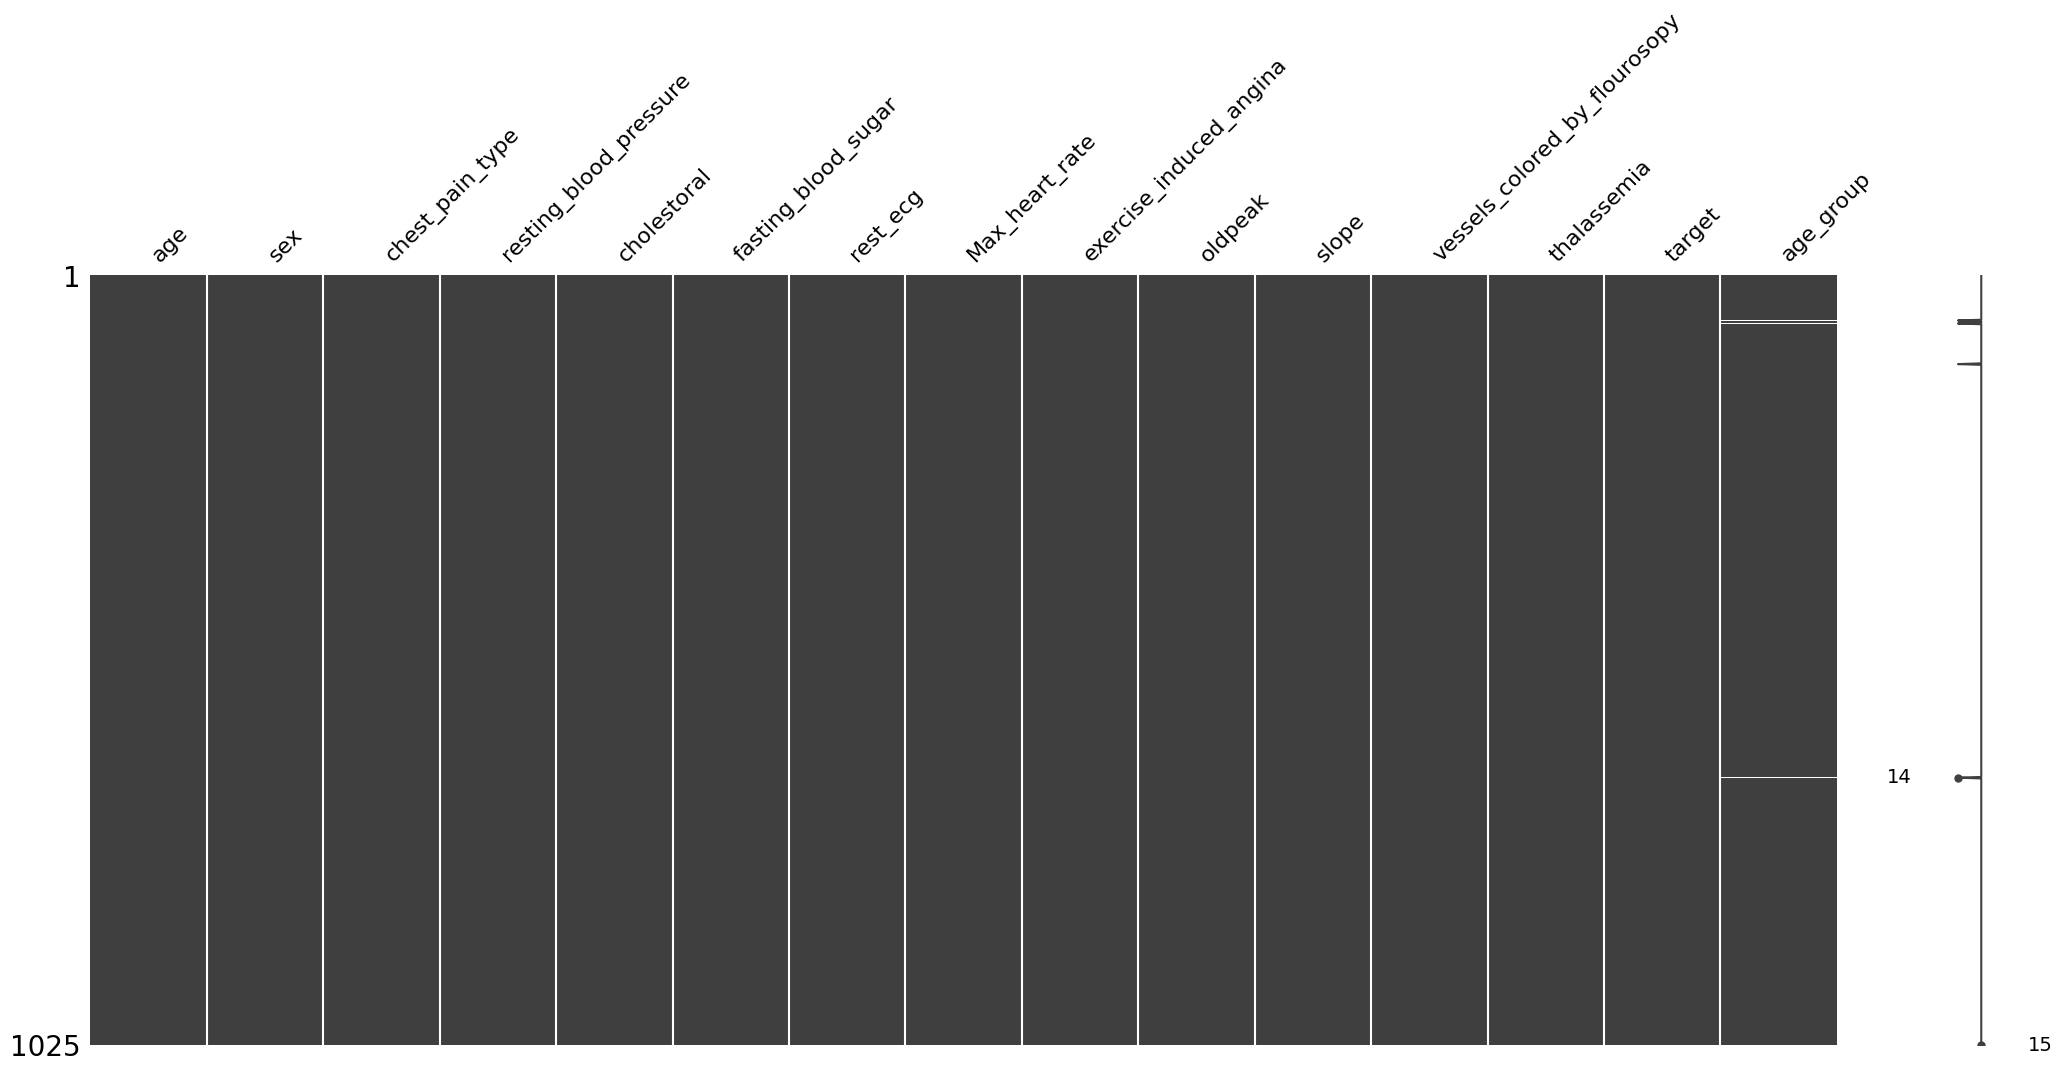

In [47]:
msno.matrix(df)
plt.show()

*Check & Handle Outliyers*

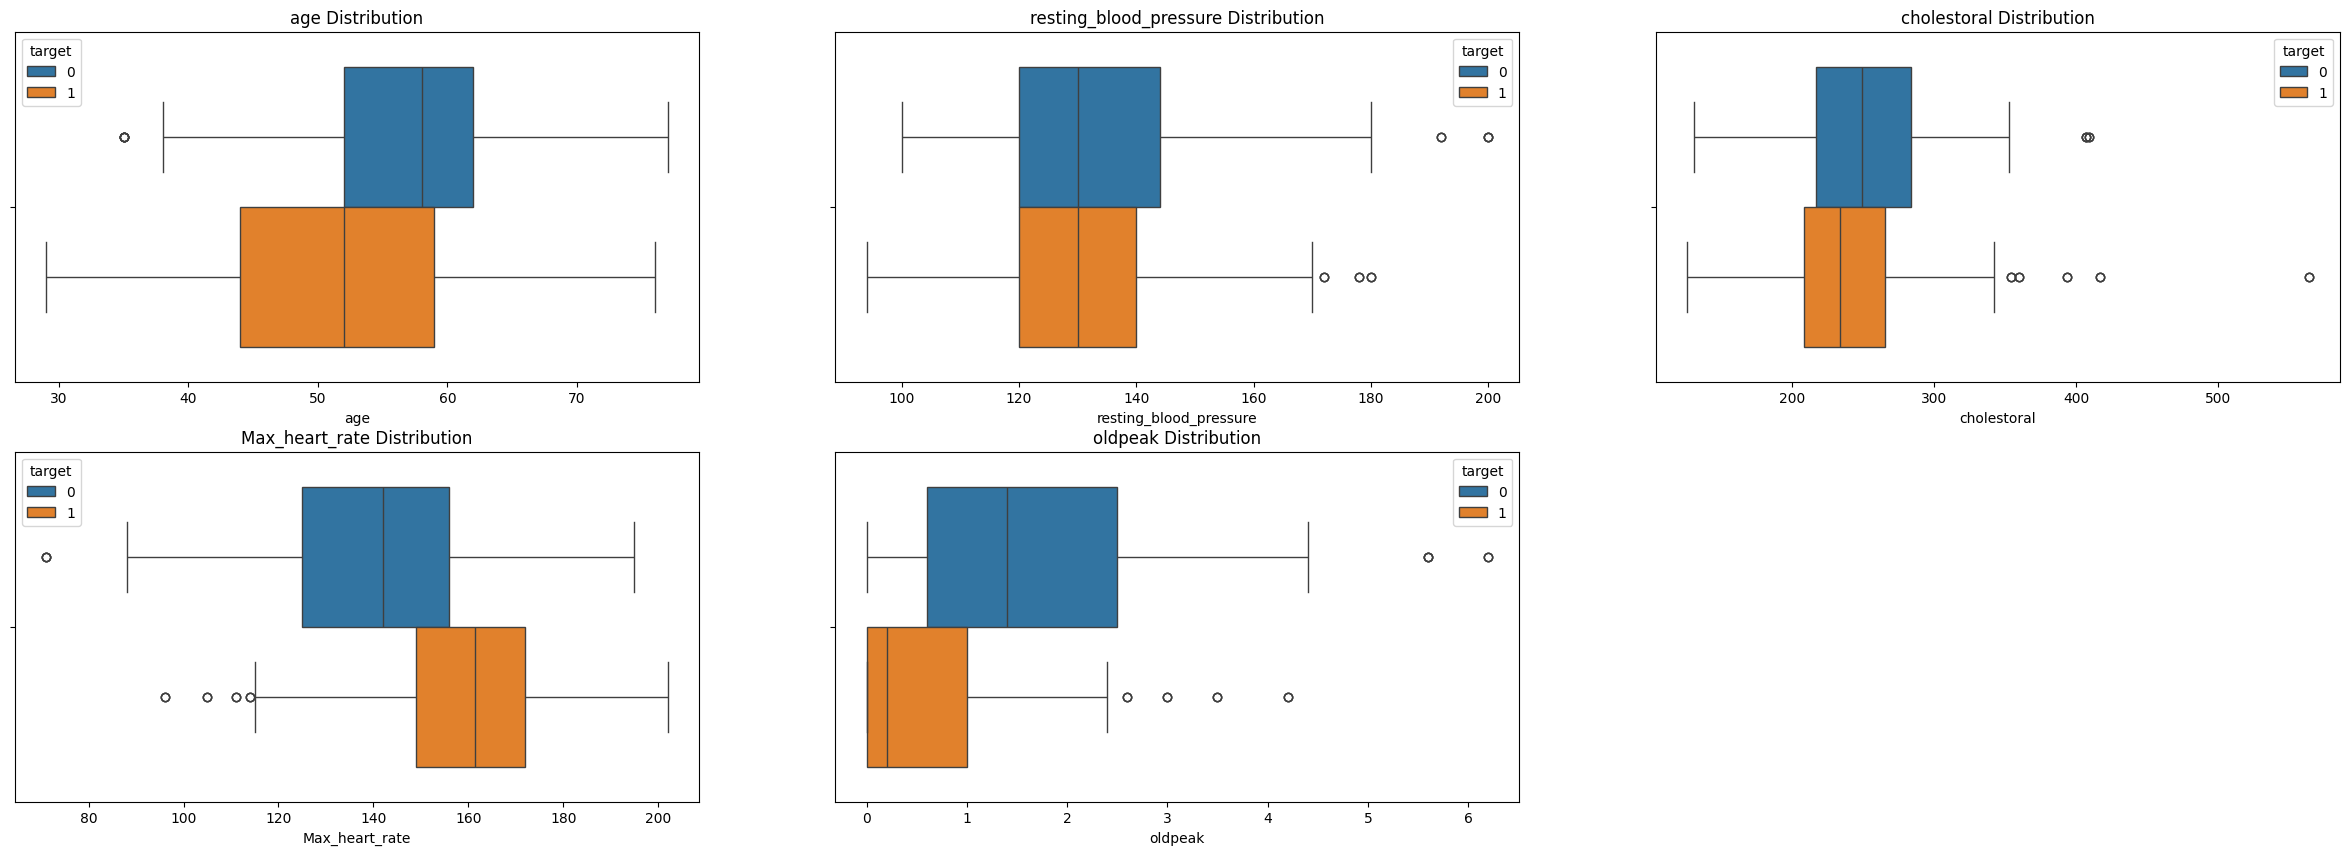

In [48]:
fig, axes = plt.subplots(2,3,figsize = (30,10))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(x = col,  data = df, hue= 'target', ax= axes[i])
    axes[i].set_title(f'{col} Distribution')
    
# remove empty subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])


In [49]:
def outliers_handling(x, p1=0.25 , p2=0.75):
    q1 = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    return x.clip(lower=min_limit, upper=max_limit)

for col in numerical_features:
    df[col] = outliers_handling(df[col])

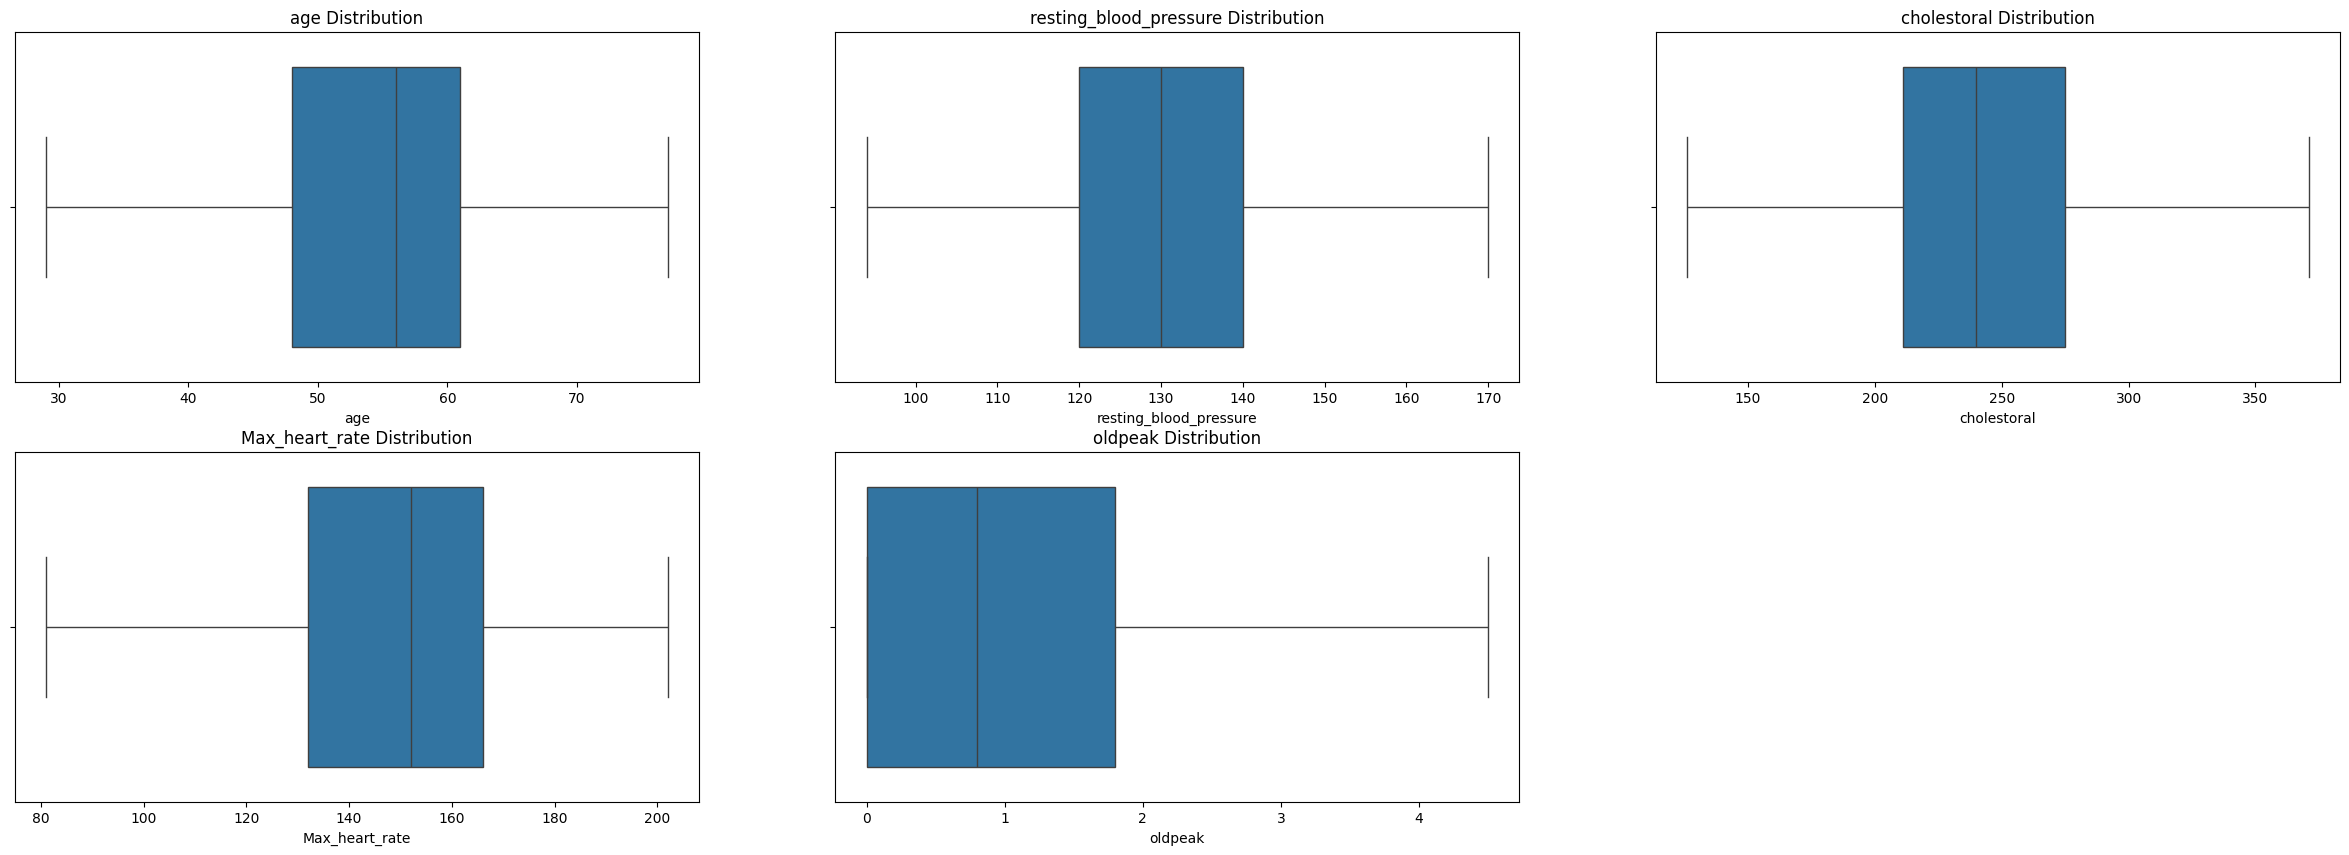

In [50]:
fig, axes = plt.subplots(2,3,figsize = (30,10))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(x = col,  data = df, ax= axes[i])
    axes[i].set_title(f'{col} Distribution')
    
# remove empty subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])


In [51]:
X = df.drop(columns = 'target')
y = df['target']
X.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,age_group
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,51-60
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,51-60
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,61-70
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,61-70
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,61-70


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((820, 14), (820,), (205, 14), (205,))

In [53]:
num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy = 'mean')),
    #('poly', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler())
])

nominal_pipeline = Pipeline([
    ('nom_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_features ),
    ('nominal_pipeline', nominal_pipeline, categorical_features)
]).set_output(transform = 'pandas')

In [54]:
x_train_prep = preprocessor.fit_transform(X_train)
x_test_prep = preprocessor.transform(X_test)

In [55]:
x_train_prep.head()

,num_pipeline__age,num_pipeline__resting_blood_pressure,num_pipeline__cholestoral,num_pipeline__Max_heart_rate,num_pipeline__oldpeak,nominal_pipeline__sex_Male,nominal_pipeline__chest_pain_type_Atypical angina,nominal_pipeline__chest_pain_type_Non-anginal pain,nominal_pipeline__chest_pain_type_Typical angina,nominal_pipeline__fasting_blood_sugar_Lower than 120 mg/ml,...,nominal_pipeline__exercise_induced_angina_Yes,nominal_pipeline__slope_Flat,nominal_pipeline__slope_Upsloping,nominal_pipeline__vessels_colored_by_flourosopy_One,nominal_pipeline__vessels_colored_by_flourosopy_Three,nominal_pipeline__vessels_colored_by_flourosopy_Two,nominal_pipeline__vessels_colored_by_flourosopy_Zero,nominal_pipeline__thalassemia_No,nominal_pipeline__thalassemia_Normal,nominal_pipeline__thalassemia_Reversable Defect
912,-2.132019,-0.672863,-1.022961,-0.831441,0.473472,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
658,1.072140,-0.369037,1.358854,-0.787526,0.648792,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
883,-0.695672,-0.429802,0.607831,0.749502,-0.490790,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
646,-0.806160,-1.402045,-0.057360,0.134691,-0.929091,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
467,-0.806160,-1.280514,0.629289,-1.358422,-0.052489,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
import joblib

# Save fitted preprocessor
joblib.dump(preprocessor, "../models/preprocessor.pkl")
print("💾 Preprocessor saved as preprocessor.pkl")

💾 Preprocessor saved as preprocessor.pkl


In [57]:
x_train_prep.to_csv('x_train_prep.csv',index=False)
x_test_prep.to_csv('x_test_prep.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)